In [46]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow import keras
from sklearn.model_selection import KFold

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:15000,:,:]
train_labels = train_labels[:15000]
test_images = test_images[:2000,:,:]
test_labels = test_labels[:2000]
train_images.shape

(15000, 28, 28)

In [47]:
train_images = train_images.reshape((15000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((2000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [48]:
model = models.Sequential()

model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [50]:
history = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.33)

Epoch 1/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7519 - loss: 0.8705 - val_accuracy: 0.8930 - val_loss: 0.3907
Epoch 2/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9242 - loss: 0.2663 - val_accuracy: 0.9186 - val_loss: 0.2845
Epoch 3/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9482 - loss: 0.1846 - val_accuracy: 0.9184 - val_loss: 0.2784
Epoch 4/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9556 - loss: 0.1534 - val_accuracy: 0.9410 - val_loss: 0.2015
Epoch 5/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9719 - loss: 0.1051 - val_accuracy: 0.9412 - val_loss: 0.1975
Epoch 6/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9781 - loss: 0.0822 - val_accuracy: 0.9412 - val_loss: 0.1971
Epoch 7/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9855 - loss: 0.0617 - val_accuracy: 0.9416 - val_loss: 0.1949
Epoch 8/25
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9904 - loss: 0.0451 - val_accuracy: 0.9420 - v

In [51]:
predictions = model.predict(test_images[:10])

predicted_digits = np.argmax(predictions, axis=1)

actual_digits = test_labels[:10]

for i in range(10):
    print(f"Image {i+1}: Predicted = {predicted_digits[i]}, Actual = {actual_digits[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image 1: Predicted = 7, Actual = 7
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 1, Actual = 1
Image 4: Predicted = 0, Actual = 0
Image 5: Predicted = 4, Actual = 4
Image 6: Predicted = 1, Actual = 1
Image 7: Predicted = 4, Actual = 4
Image 8: Predicted = 9, Actual = 9
Image 9: Predicted = 6, Actual = 5
Image 10: Predicted = 9, Actual = 9


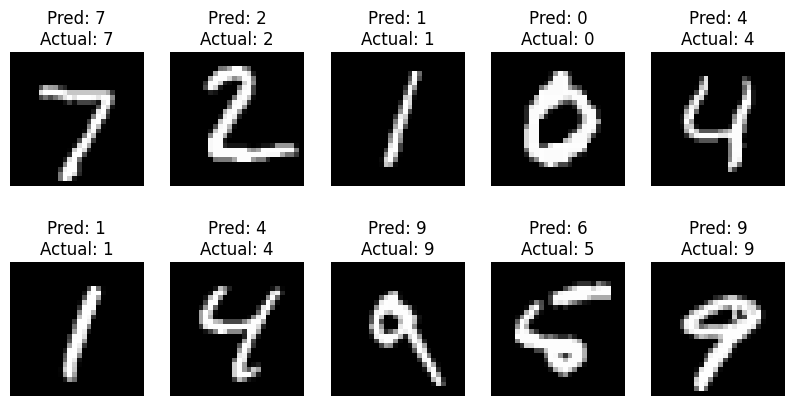

In [66]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {predicted_digits[i]}\nActual: {actual_digits[i]}")
    plt.axis("off")
plt.show()

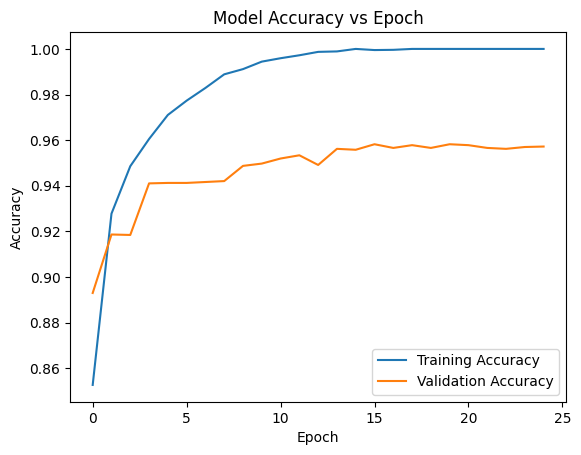

In [53]:
# training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Epoch')
plt.legend()
plt.show()

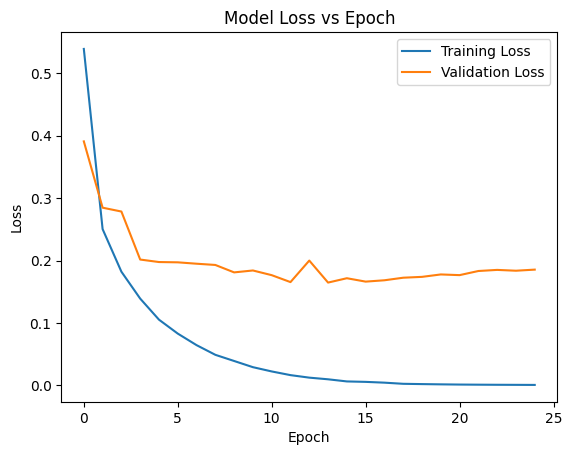

In [54]:
# training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs Epoch')
plt.legend()
plt.show()

In [55]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,102 (3.11 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,052 (1.55 MB)

Did the model overfit?

As the training performance keeps improving but validation performance stops improving, this suggests the model is overfitting.

In [56]:
indices_permutation = np.random.permutation(len(train_images))
shuffled_inputs = train_images[indices_permutation]
shuffled_targets = train_labels[indices_permutation]

kfold = KFold(n_splits=4, shuffle=True, random_state=42)
fold_no = 1
train_accuracies = []
val_accuracies = []

for train_idx, val_idx in kfold.split(shuffled_inputs):
    print(f"Fold {fold_no}")

    training_inputs, val_inputs = shuffled_inputs[train_idx], shuffled_inputs[val_idx]
    training_targets, val_targets = shuffled_targets[train_idx], shuffled_targets[val_idx]

    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    history = model.fit(
        training_inputs,
        training_targets,
        epochs=5,
        batch_size=128,
        validation_data=(val_inputs, val_targets),
    )

    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

    print(f"Fold {fold_no} - Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    fold_no += 1

print(f"\nAverage Validation Accuracy: {np.mean(val_accuracies):.4f}")

Fold 1
Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7750 - loss: 0.7956 - val_accuracy: 0.9149 - val_loss: 0.3190
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9317 - loss: 0.2477 - val_accuracy: 0.9285 - val_loss: 0.2631
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9493 - loss: 0.1799 - val_accuracy: 0.9376 - val_loss: 0.2259
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9626 - loss: 0.1388 - val_accuracy: 0.9443 - val_loss: 0.1988
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9742 - loss: 0.0962 - val_accuracy: 0.9443 - val_loss: 0.1942
Fold 1 - Validation Accuracy: 0.9443
Fold 2
Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7529 - loss: 0.8480 - val_accuracy: 0.9096 - val_loss: 0.2977
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9216 - loss: 0.2793 - val_accuracy: 0.9357 - val_loss: 0.2140
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.946

**Question 2**

In [57]:
binary_train_labels = np.where(train_labels == 0, 0, 1)
binary_test_labels = np.where(test_labels == 0, 0, 1)

In [58]:
binary_model = keras.Sequential([
    keras.layers.Dense(1, activation='sigmoid', input_shape=(784,))
])

binary_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

binary_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
binary_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

In [60]:
history = binary_model.fit(
    train_images,
    binary_train_labels,
    epochs=50,
    batch_size=128,
    validation_data=(test_images, binary_test_labels))

Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8112 - loss: 0.4218 - val_binary_accuracy: 0.9685 - val_loss: 0.1228
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9742 - loss: 0.1037 - val_binary_accuracy: 0.9825 - val_loss: 0.0676
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9835 - loss: 0.0641 - val_binary_accuracy: 0.9850 - val_loss: 0.0496
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9866 - loss: 0.0500 - val_binary_accuracy: 0.9885 - val_loss: 0.0419
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9893 - loss: 0.0406 - val_binary_accuracy: 0.9870 - val_loss: 0.0386
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9895 - loss: 0.0367 - val_binary_accuracy: 0.9885 - val_loss: 0.0367
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9891 - loss: 0.0355 - val_binary_accuracy: 0.9895 - val_loss: 0.0340
Epoch 

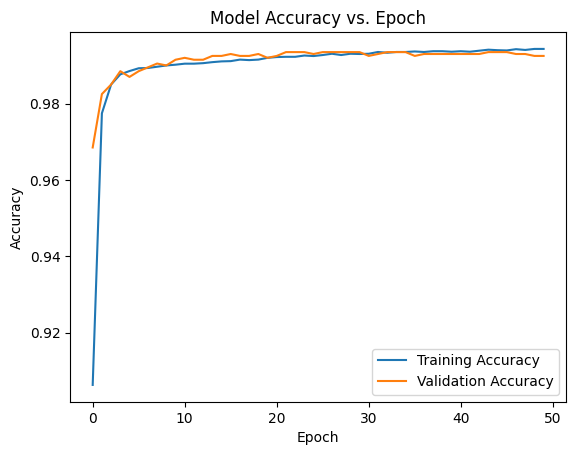

In [67]:
plt.plot(history.history['binary_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. Epoch')
plt.legend()
plt.show()

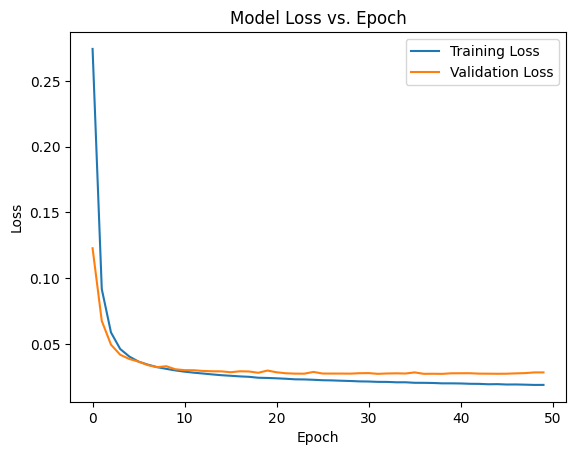

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss vs. Epoch')
plt.legend()
plt.show()

In [63]:
binary_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 1)                   │             785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,572 (6.14 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 787 (3.08 KB)

The model is not overfitting, the training and validation metrics are aligned which indicates the model is performing consistently across datasets.